# CLUB & CEO Affliation
The membership of the chief executive officers from 26 corporations in 15 clubs.
CEOs.net - two-mode network with 98 edges & 41 vertices
http://vlado.fmf.uni-lj.si/pub/networks/data/WaFa/default.htm

In [11]:
import networkx as nx
import networkx.algorithms.bipartite as bi
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.figure(figsize=(15,10))
%matplotlib inline

# Load Data

In [12]:
import numpy as np
import pandas as pd
#df = pd.read_csv(r"C:\Users\krishna.rajan\Desktop\Personal\Data620\Club_CEO.csv")
df = pd.read_csv("https://raw.githubusercontent.com/rajank17/Data620/master/Club_CEO.csv")

df.head()

,club,CE0-1,CE0-2,CE0-3,CE0-4,CE0-5,CE0-6,CE0-7,CE0-8,CE0-9,...,CE0-17,CE0-18,CE0-19,CE0-20,CE0-21,CE0-22,CE0-23,CE0-24,CE0-25,CE0-26
0,club-1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,club-2,0,0,0,1,0,1,0,0,0,...,1,0,0,1,0,0,1,0,1,1
2,club-3,1,1,1,1,1,1,1,0,0,...,1,0,1,1,1,1,1,1,1,1
3,club-4,1,0,0,0,0,0,1,1,1,...,0,1,1,1,1,0,0,1,0,0
4,club-5,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [13]:
dft = pd.melt(df,id_vars=["club"],var_name="CEO", value_name = "values")
dft.set_index('club')
#dft = dft[dft==1]
dft[:5]

,club,CEO,values
0,club-1,CE0-1,0
1,club-2,CE0-1,0
2,club-3,CE0-1,1
3,club-4,CE0-1,1
4,club-5,CE0-1,0


In [14]:
club = dft.club.unique()
club


array(['club-1', 'club-2', 'club-3', 'club-4', 'club-5', 'club-6',
       'club-7', 'club-8', 'club-9', 'club-10', 'club-11', 'club-12',
       'club-13', 'club-14', 'club-15 '], dtype=object)

In [15]:
ceos = dft.CEO.unique()
ceos


array(['CE0-1', 'CE0-2', 'CE0-3', 'CE0-4', 'CE0-5', 'CE0-6', 'CE0-7',
       'CE0-8', 'CE0-9', 'CE0-10', 'CE0-11', ' CE0-12', 'CE0-13',
       'CE0-14', 'CE0-15', 'CE0-16', 'CE0-17', 'CE0-18', 'CE0-19',
       'CE0-20', ' CE0-21', ' CE0-22', ' CE0-23', ' CE0-24', 'CE0-25',
       ' CE0-26'], dtype=object)

In [16]:
stacked = df.set_index('club').stack()

stacked = stacked[stacked==1]
#we are interested in the 1's as it indicates the nodes are connected.
stacked

club             
club-1    CE0-9      1
          CE0-19     1
           CE0-24    1
club-2    CE0-4      1
          CE0-6      1
          CE0-11     1
          CE0-14     1
          CE0-15     1
          CE0-16     1
          CE0-17     1
          CE0-20     1
           CE0-23    1
          CE0-25     1
           CE0-26    1
club-3    CE0-1      1
          CE0-2      1
          CE0-3      1
          CE0-4      1
          CE0-5      1
          CE0-6      1
          CE0-7      1
          CE0-10     1
          CE0-11     1
          CE0-13     1
          CE0-14     1
          CE0-15     1
          CE0-16     1
          CE0-17     1
          CE0-19     1
          CE0-20     1
                    ..
club-9    CE0-19     1
club-10   CE0-7      1
          CE0-8      1
          CE0-9      1
club-11   CE0-7      1
          CE0-14     1
          CE0-17     1
          CE0-20     1
club-12   CE0-3      1
          CE0-14     1
          CE0-17     1
          CE0-18

In [18]:
#Code below gives list of edges between Clubs & CEO's
club_ceo_edges = stacked.index.tolist()
club_ceo_edges

[('club-1', 'CE0-9'),
 ('club-1', 'CE0-19'),
 ('club-1', ' CE0-24'),
 ('club-2', 'CE0-4'),
 ('club-2', 'CE0-6'),
 ('club-2', 'CE0-11'),
 ('club-2', 'CE0-14'),
 ('club-2', 'CE0-15'),
 ('club-2', 'CE0-16'),
 ('club-2', 'CE0-17'),
 ('club-2', 'CE0-20'),
 ('club-2', ' CE0-23'),
 ('club-2', 'CE0-25'),
 ('club-2', ' CE0-26'),
 ('club-3', 'CE0-1'),
 ('club-3', 'CE0-2'),
 ('club-3', 'CE0-3'),
 ('club-3', 'CE0-4'),
 ('club-3', 'CE0-5'),
 ('club-3', 'CE0-6'),
 ('club-3', 'CE0-7'),
 ('club-3', 'CE0-10'),
 ('club-3', 'CE0-11'),
 ('club-3', 'CE0-13'),
 ('club-3', 'CE0-14'),
 ('club-3', 'CE0-15'),
 ('club-3', 'CE0-16'),
 ('club-3', 'CE0-17'),
 ('club-3', 'CE0-19'),
 ('club-3', 'CE0-20'),
 ('club-3', ' CE0-21'),
 ('club-3', ' CE0-22'),
 ('club-3', ' CE0-23'),
 ('club-3', ' CE0-24'),
 ('club-3', 'CE0-25'),
 ('club-3', ' CE0-26'),
 ('club-4', 'CE0-1'),
 ('club-4', 'CE0-7'),
 ('club-4', 'CE0-8'),
 ('club-4', 'CE0-9'),
 ('club-4', ' CE0-12'),
 ('club-4', 'CE0-13'),
 ('club-4', 'CE0-14'),
 ('club-4', 'CE0

# Analysis Stage

In [19]:
G = nx.Graph(club_ceo_edges)
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 41
Number of edges: 98
Average degree:   4.7805


# Graph of Entire Network


C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


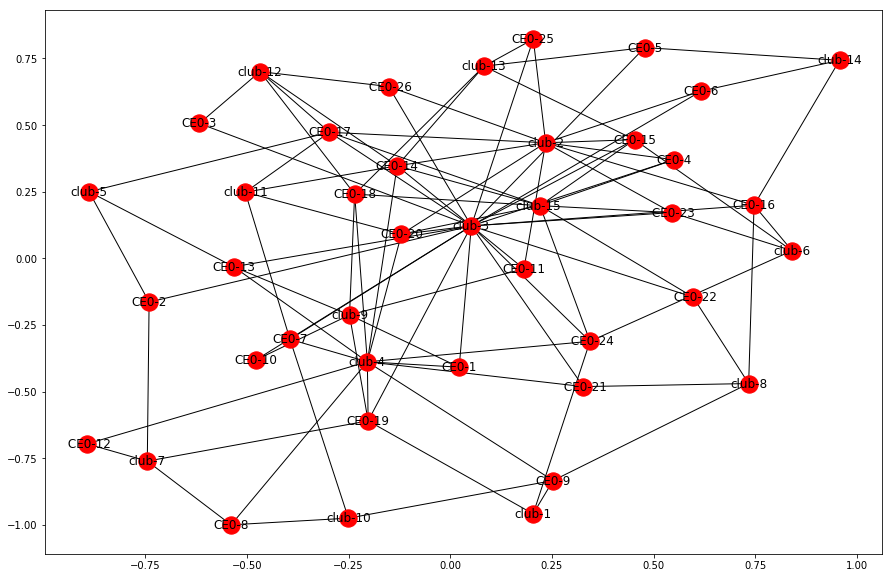

In [20]:
plt.figure(figsize = (15,10))
#graph of the entire network that includes CEOs and Clubs.
nx.draw_networkx(G)

# Graph of CLUBS & CEO's

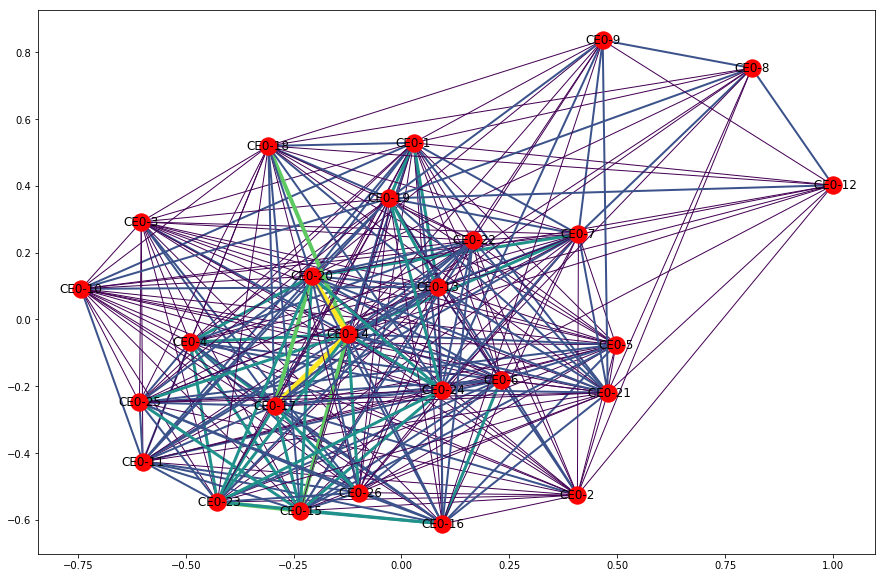

In [22]:
ceo_Gp = nx.bipartite.project(G,df.set_index('club').columns)
# or
# nx.bipartite.project(G,df.set_index('DOC').index)

ceo_e = bi.weighted_projected_graph(G, ceo_Gp, ratio=False)
weights=[edata['weight'] for f,t,edata in ceo_e.edges(data=True)]
plt.figure(figsize=(15,10))
nx.draw_networkx(ceo_e, width=weights, edge_color=weights)

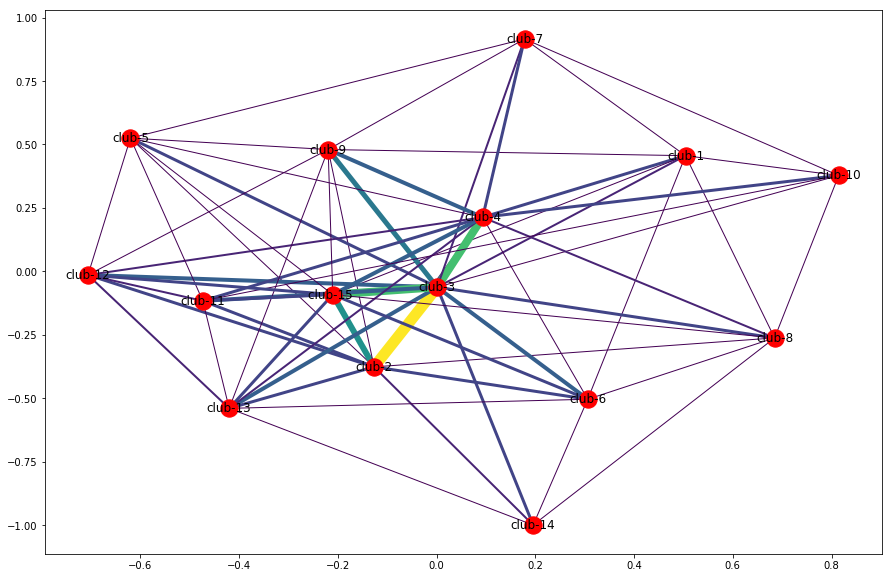

In [28]:
club_Gp = nx.bipartite.project(G,df.set_index('club').index)
club_e = bi.weighted_projected_graph(G, club_Gp, ratio=False)

weights=[edata['weight'] for f,t,edata in club_e.edges(data=True)]
plt.figure(figsize=(15,10))
nx.draw_networkx(club_e, width=weights, edge_color=weights)

# Degree Centrality of Clubs & CEO's


In [29]:
# Degree of CLUB (number of edges adjacent each node)
def sort_x(x):
    sort = sorted(x.items(), key = lambda kv: (-kv[1], kv[0]) )
    return sort

C_degree = nx.degree(club_Gp)
C_degree = {k:round(v,1) for k, v in (C_degree)}
C_degree = sort_x(C_degree)
C_degree

[('club-3', 14),
 ('club-4', 13),
 ('club-15 ', 11),
 ('club-2', 11),
 ('club-13', 9),
 ('club-9', 9),
 ('club-1', 8),
 ('club-11', 8),
 ('club-12', 8),
 ('club-5', 8),
 ('club-6', 8),
 ('club-8', 8),
 ('club-10', 6),
 ('club-7', 6),
 ('club-14', 5)]

In [26]:
# Degree of CEO (number of edges adjacent each node)
def sort_x(x):
    sort = sorted(x.items(), key = lambda kv: (-kv[1], kv[0]) )
    return sort

C_degree = nx.degree(ceo_Gp)
C_degree = {k:round(v,1) for k, v in (C_degree)}
C_degree = sort_x(C_degree)
C_degree

[(' CE0-21', 25),
 (' CE0-24', 25),
 ('CE0-1', 25),
 ('CE0-13', 25),
 ('CE0-14', 25),
 ('CE0-19', 25),
 ('CE0-20', 25),
 ('CE0-7', 25),
 (' CE0-22', 23),
 ('CE0-2', 23),
 (' CE0-23', 22),
 (' CE0-26', 22),
 ('CE0-10', 22),
 ('CE0-11', 22),
 ('CE0-15', 22),
 ('CE0-16', 22),
 ('CE0-17', 22),
 ('CE0-18', 22),
 ('CE0-25', 22),
 ('CE0-3', 22),
 ('CE0-4', 22),
 ('CE0-5', 22),
 ('CE0-6', 21),
 ('CE0-9', 13),
 (' CE0-12', 12),
 ('CE0-8', 12)]

# CLUB & CEO Center

In [31]:
#Center
print("Center : " , nx.center(club_Gp))

#Diameter
print("Diameter : " ,nx.diameter(club_Gp))

#Radius
print("Radius : " ,nx.radius(club_Gp))

Center :  ['club-3']
Diameter :  2
Radius :  1


In [27]:
#Center
print("Center : " , nx.center(ceo_Gp))

#Diameter
print("Diameter : " ,nx.diameter(ceo_Gp))

#Radius
print("Radius : " ,nx.radius(ceo_Gp))

Center :  ['CE0-1', 'CE0-7', 'CE0-13', 'CE0-14', 'CE0-19', 'CE0-20', ' CE0-21', ' CE0-24']
Diameter :  2
Radius :  1


From the output we can see the center is occupied by 8 CEOs ('CE0-1', 'CE0-7', 'CE0-13', 'CE0-14', 'CE0-19', 'CE0-20', 'CE0-21', 'CE0-24') and 1 Club (Club-3).

# ISLAND ANALYSIS



In [37]:
## Implementing the Island Method to identify subgroups. 
def trim_edges(g, weight = 1):
    # Implements a trimming of the graph edges for the Island Analysis
    edges = []
    g2 = nx.Graph()
    for f, to, edata in g.edges(data=True):
        if edata['weight'] > weight:
            x = float(edata['weight'])
            edges.append((f,to,x))
    g2.add_weighted_edges_from(edges)
    return g2

def island_method(g, iterations = 5):
    # Iterates through the graph removing edges and returning the number of edges removed and
    #  the trimmed graph
    weights = [edata['weight'] for f,to,edata in g.edges(data=True)]
    mn=int(min(weights))
    mx=int(max(weights))
    step = int((mx-mn)/iterations)
    return [[threshold, trim_edges(g,threshold)] for threshold in range(mn,mx,step)]

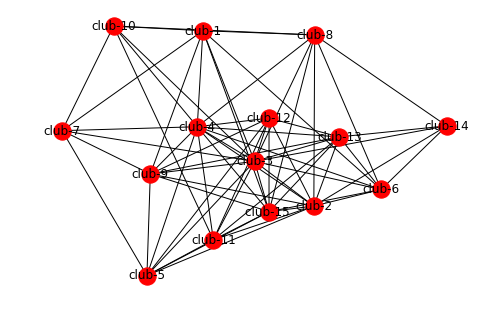

In [38]:
# Build the graph from the node sets and edges
# set bipartite attribute to ensure weighted projection will work
ceo_nodes = list(dft['CEO'].unique())
club_nodes = list(dft['club'].unique())
#edge_bunch = [tuple(i) for i in dft.values]

g = nx.Graph()
g.add_nodes_from(club_nodes,node_type='Club', bipartite=0)
g.add_nodes_from(ceo_nodes,node_type='CEO', bipartite=1)
g.add_edges_from(club_ceo_edges)

l=bi.weighted_projected_graph(g,club_nodes)
pos = nx.spring_layout(l)
nx.draw(l, pos = pos, with_labels=True)

In [39]:
cc=list(nx.connected_component_subgraphs(l))[0]
print(nx.info(cc)) 
islands = island_method(l)

Name: 
Type: Graph
Number of nodes: 15
Number of edges: 66
Average degree:   8.8000


In [40]:
print("Threshold, Nodes/Size, Edges, Number of Connected Components")
for i in islands:
    print (i[0], nx.number_of_nodes(i[1]), nx.number_of_edges(i[1]), nx.number_connected_components(i[1]) 
           ,nx.degree_centrality(i[1]))

Threshold, Nodes/Size, Edges, Number of Connected Components
1 15 35 1 {'club-1': 0.14285714285714285, 'club-4': 0.7857142857142857, 'club-3': 0.9285714285714285, 'club-2': 0.5714285714285714, 'club-13': 0.3571428571428571, 'club-12': 0.42857142857142855, 'club-15 ': 0.5, 'club-6': 0.21428571428571427, 'club-14': 0.14285714285714285, 'club-11': 0.3571428571428571, 'club-5': 0.07142857142857142, 'club-9': 0.14285714285714285, 'club-7': 0.14285714285714285, 'club-8': 0.14285714285714285, 'club-10': 0.07142857142857142}
3 9 11 1 {'club-2': 0.25, 'club-15 ': 0.375, 'club-3': 1.0, 'club-13': 0.125, 'club-4': 0.375, 'club-12': 0.125, 'club-6': 0.125, 'club-9': 0.25, 'club-11': 0.125}
5 4 4 1 {'club-2': 0.6666666666666666, 'club-15 ': 0.6666666666666666, 'club-3': 1.0, 'club-4': 0.3333333333333333}
7 4 3 1 {'club-2': 0.3333333333333333, 'club-3': 1.0, 'club-4': 0.3333333333333333, 'club-15 ': 0.3333333333333333}
9 2 1 1 {'club-2': 1.0, 'club-3': 1.0}


This is interpreted as: at a threshold of 1, there are 15 nodes and at a threshold of 3, there are 9 nodes  In all cases the island is 1. since this is not a larger data set, there is only 1 island. Club-3 has high degree centrality & Influence.

# Link to Presentation
https://youtu.be/IcOvietcFos